In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
from dash import Dash, dcc, html, Input, Output, State

In [2]:
house = pd.read_csv("E:\Housing\Housing.csv")

<>:1: SyntaxWarning: invalid escape sequence '\H'
<>:1: SyntaxWarning: invalid escape sequence '\H'
C:\Users\hanif\AppData\Local\Temp\ipykernel_3784\887600065.py:1: SyntaxWarning: invalid escape sequence '\H'
  house = pd.read_csv("E:\Housing\Housing.csv")


In [3]:
print(house.head())

      price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2              no              no        2      yes   semi-furnished  
3              no             yes        3      yes        furnished  
4              no             yes        2       no        furnished  


In [4]:
print(house.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB
None


In [5]:
print(house.describe())

              price          area    bedrooms   bathrooms     stories  \
count  5.450000e+02    545.000000  545.000000  545.000000  545.000000   
mean   4.766729e+06   5150.541284    2.965138    1.286239    1.805505   
std    1.870440e+06   2170.141023    0.738064    0.502470    0.867492   
min    1.750000e+06   1650.000000    1.000000    1.000000    1.000000   
25%    3.430000e+06   3600.000000    2.000000    1.000000    1.000000   
50%    4.340000e+06   4600.000000    3.000000    1.000000    2.000000   
75%    5.740000e+06   6360.000000    3.000000    2.000000    2.000000   
max    1.330000e+07  16200.000000    6.000000    4.000000    4.000000   

          parking  
count  545.000000  
mean     0.693578  
std      0.861586  
min      0.000000  
25%      0.000000  
50%      0.000000  
75%      1.000000  
max      3.000000  


In [6]:
print(house.isnull().sum())

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64


In [7]:
house.sort_values("price",ascending=True, inplace=True)
house.reset_index(drop=True, inplace=True)

In [8]:
#task 2
house["mainroad"]=house["mainroad"].map({"yes":1,"no":0})
house["basement"]=house["basement"].map({"yes":1,"no":0})
house["prefarea"]=house["prefarea"].map({"yes":1,"no":0})
house["guestroom"]=house["guestroom"].map({"yes":1,"no":0})
house["hotwaterheating"]=house["hotwaterheating"].map({"yes":1,"no":0})
house["airconditioning"]=house["airconditioning"].map({"yes":1,"no":0})

In [9]:
#task 3
house["furnishingstatus"] = house["furnishingstatus"].map({"unfurnished": 0, "semi-furnished": 1,"furnished": 2})

In [10]:
#task 4 :))))))))))))))))))
house["options"]=house[["mainroad","basement","prefarea","guestroom","hotwaterheating","airconditioning"]].sum(axis=1)

In [11]:
#task 5
def describe_options(x):
    if x == 0:
        return "no option"
    elif x == 6:
        return "full option"
    else:
        return "half option"
house["options_description"] = house["options"].apply(describe_options)

In [12]:
#last task :]
house = house.sort_values(by=["price", "furnishingstatus", "options"], ascending=[True, True, True]).reset_index(drop=True)
# house.to_csv("E:\Housing\Housing_sorted.csv", index=False)

In [13]:
df = pd.read_csv("E:\Housing\Housing_sorted.csv")

<>:1: SyntaxWarning: invalid escape sequence '\H'
<>:1: SyntaxWarning: invalid escape sequence '\H'
C:\Users\hanif\AppData\Local\Temp\ipykernel_3784\22976002.py:1: SyntaxWarning: invalid escape sequence '\H'
  df = pd.read_csv("E:\Housing\Housing_sorted.csv")


In [14]:
print(df.head())

      price      area  bedrooms  bathrooms  stories  mainroad  guestroom  \
0 -2.506190 -0.529529         3          1        2         1          0   
1 -2.506190 -0.684333         2          1        1         1          0   
2 -2.506190 -1.232991         3          1        1         0          0   
3 -2.479962 -1.717222         3          1        1         0          0   
4 -2.400708 -1.156444         2          1        1         1          0   

   basement  hotwaterheating  airconditioning  parking  prefarea  \
0         0                0                0        0         0   
1         0                0                0        0         0   
2         0                0                0        0         0   
3         0                0                0        0         0   
4         1                0                0        2         0   

   furnishingstatus  options options_description  
0                 0        1         half option  
1                 0        1    

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   price                545 non-null    float64
 1   area                 545 non-null    float64
 2   bedrooms             545 non-null    int64  
 3   bathrooms            545 non-null    int64  
 4   stories              545 non-null    int64  
 5   mainroad             545 non-null    int64  
 6   guestroom            545 non-null    int64  
 7   basement             545 non-null    int64  
 8   hotwaterheating      545 non-null    int64  
 9   airconditioning      545 non-null    int64  
 10  parking              545 non-null    int64  
 11  prefarea             545 non-null    int64  
 12  furnishingstatus     545 non-null    int64  
 13  options              545 non-null    int64  
 14  options_description  545 non-null    object 
dtypes: float64(2), int64(12), object(1)
memo

In [16]:
df.describe()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,options
count,5.450000e+02,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000
mean,1.408048e-15,-1.147298e-15,2.965138,1.286239,1.805505,0.858716,0.177982,0.350459,0.045872,0.315596,0.693578,0.234862,0.930275,1.983486
std,1.000919e+00,1.000919e+00,0.738064,0.502470,0.867492,0.348635,0.382849,0.477552,0.209399,0.465180,0.861586,0.424302,0.761373,1.195004
min,-2.506190e+00,-2.658857e+00,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-6.963412e-01,-6.982555e-01,2.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,-6.347627e-02,-8.224279e-02,3.000000,1.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2.000000
75%,6.884525e-01,7.319254e-01,3.000000,2.000000,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,2.000000,3.000000
max,2.948408e+00,3.081613e+00,6.000000,4.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,1.000000,2.000000,5.000000


In [17]:
# determine x and y 
x = df.drop(["price","options_description","options"], axis=1)
y = df["price"]

In [18]:
# separate the data 
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [19]:
# apply linear regression model
model = LinearRegression()
model.fit(X_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [20]:
# make prediction
y_predict = model.predict(X_test)

In [21]:
# calculate R^2
r2_lin = r2_score(y_test, y_predict)
print("R² score:", r2_lin)
rmse = np.sqrt(mean_squared_error(y_test, y_predict))
print("MSE : ",rmse)

R² score: 0.7282377313351056
MSE :  0.610207809546281


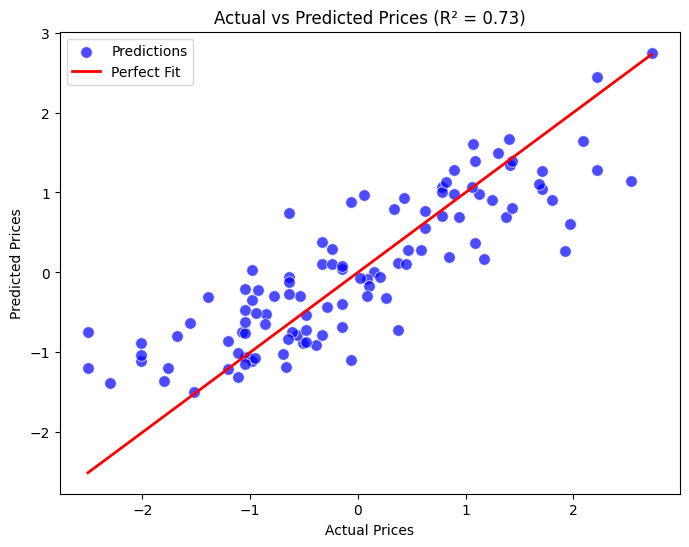

In [22]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_predict, alpha=0.7, color="blue", s=70, label="Predictions")
sns.lineplot(x=[y_test.min(), y_test.max()],
             y=[y_test.min(), y_test.max()],
             color="red", linewidth=2, label="Perfect Fit")
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title(f"Actual vs Predicted Prices (R² = {r2_lin:.2f})")
plt.legend()
plt.show()

In [23]:
# apply randomforest model
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("Random Forest R² score:", r2)
print("Random Forest RMSE:", rmse)


Random Forest R² score: 0.6594650172163815
Random Forest RMSE: 0.6830681701617771


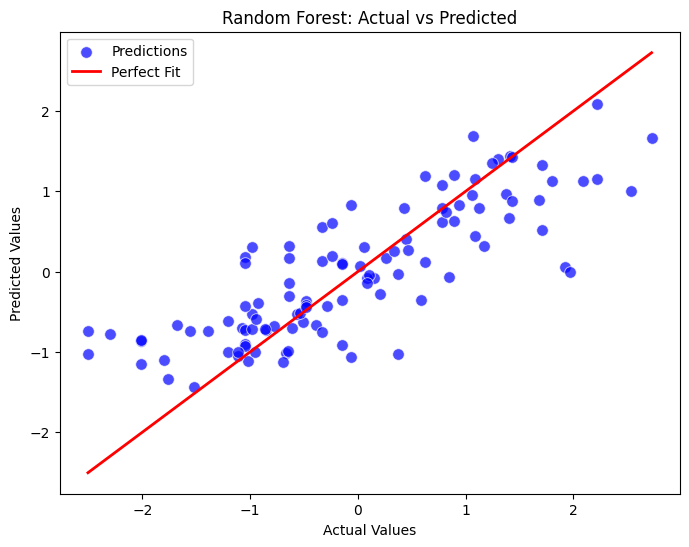

In [24]:

plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.7, color="blue", s=70, label="Predictions")
sns.lineplot(x=[y_test.min(), y_test.max()],
             y=[y_test.min(), y_test.max()],
             color="red", linewidth=2, label="Perfect Fit")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Random Forest: Actual vs Predicted")
plt.show()


In [26]:
print("\nEnter house details to predict the price")
area = float(input("Area (sqft): "))
bedrooms = int(input("Number of bedrooms: "))
bathrooms = int(input("Number of bathrooms: "))
stories = int(input("Number of stories: "))
parking = int(input("Number of parking spaces: "))

mainroad = 1 if input("Is the house on the main road? (yes/no): ").lower() == "yes" else 0
guestroom = 1 if input("Does it have a guestroom? (yes/no): ").lower() == "yes" else 0
basement = 1 if input("Does it have a basement? (yes/no): ").lower() == "yes" else 0
hotwaterheating = 1 if input("Hot water heating? (yes/no): ").lower() == "yes" else 0
airconditioning = 1 if input("Air conditioning? (yes/no): ").lower() == "yes" else 0
prefarea = 1 if input("Is it in a preferred area? (yes/no): ").lower() == "yes" else 0

furnishingstatus_input = input("Furnishing status (unfurnished/semi-furnished/furnished): ").lower()
if furnishingstatus_input == "unfurnished":
    furnishingstatus = 0
elif furnishingstatus_input == "semi-furnished":
    furnishingstatus = 1
else:
    furnishingstatus = 2

user_data = pd.DataFrame([[ 
    area, bedrooms, bathrooms, stories,
    mainroad, guestroom, basement,
    hotwaterheating, airconditioning,
    parking,
    prefarea, furnishingstatus
]], columns=X_train.columns)


predicted_price = model.predict(user_data)[0]
print(f"\n Predicted house price: {predicted_price:,.2f}")



Enter house details to predict the price

 Predicted house price: 0.64


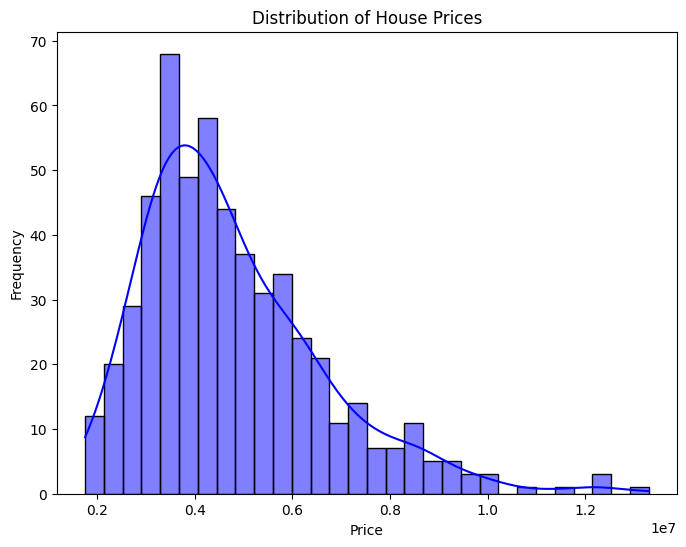

In [ ]:
# Histogram
plt.figure(figsize=(8,6))
sns.histplot(df["price"], kde=True, bins=30, color="blue")
plt.title("Distribution of House Prices")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.show()

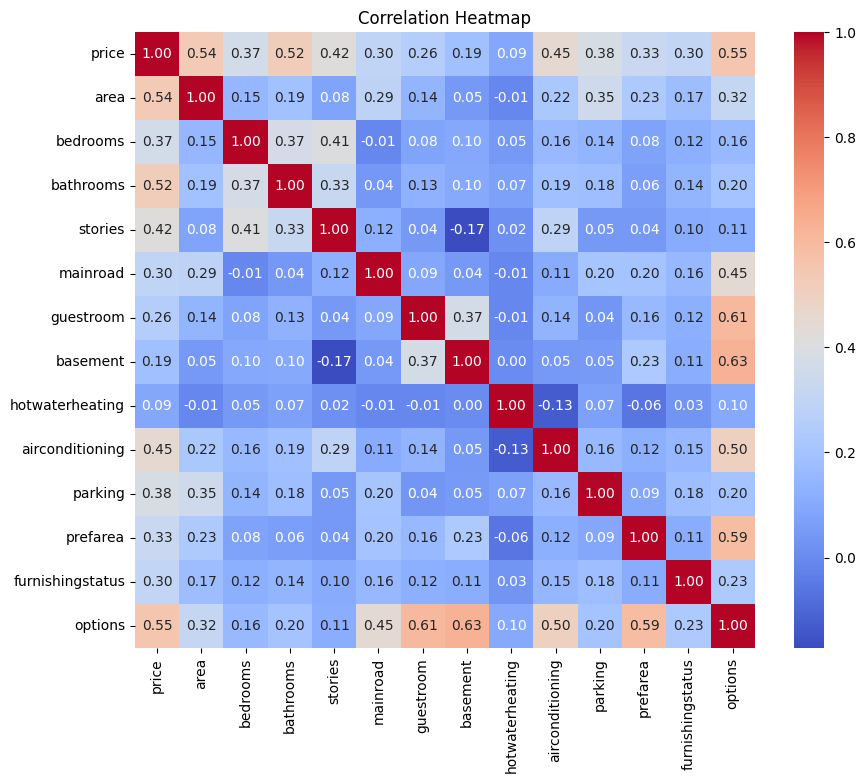

In [ ]:
#Correlation Heatmap
plt.figure(figsize=(10,8))
sns.heatmap(df.select_dtypes(include=[np.number]).corr(), 
            annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


C:\Users\hanif\AppData\Local\Temp\ipykernel_18492\2576892281.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=coef_series, y=coef_series.index, palette="coolwarm")


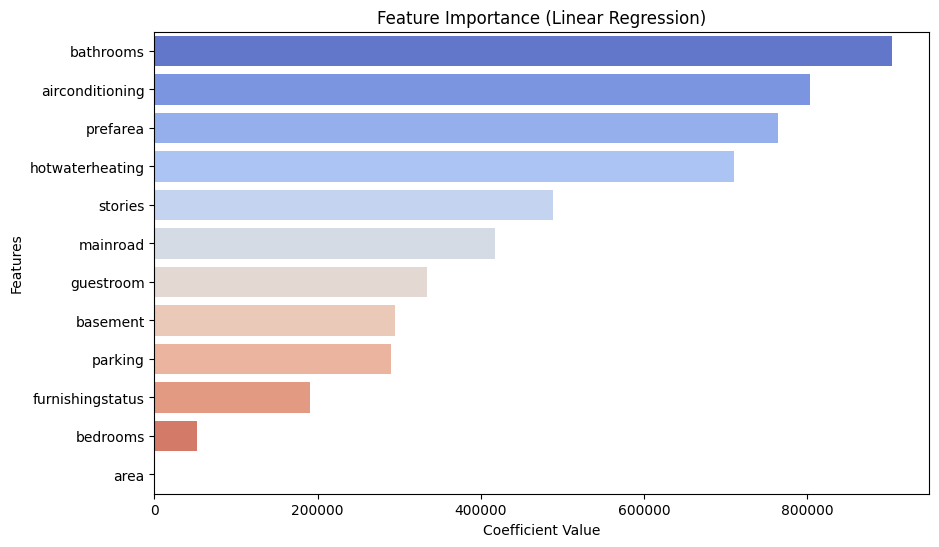

In [ ]:
# Feature Importance (Linear Regression)
coefficients = model.coef_
feature_names = X_train.columns
coef_series = pd.Series(coefficients, index=feature_names).sort_values(key=abs, ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x=coef_series, y=coef_series.index, palette="coolwarm")
plt.title("Feature Importance (Linear Regression)")
plt.xlabel("Coefficient Value")
plt.ylabel("Features")
plt.show()

C:\Users\hanif\AppData\Local\Temp\ipykernel_18492\3686125499.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feat_imp, y=feat_imp.index, palette="viridis")


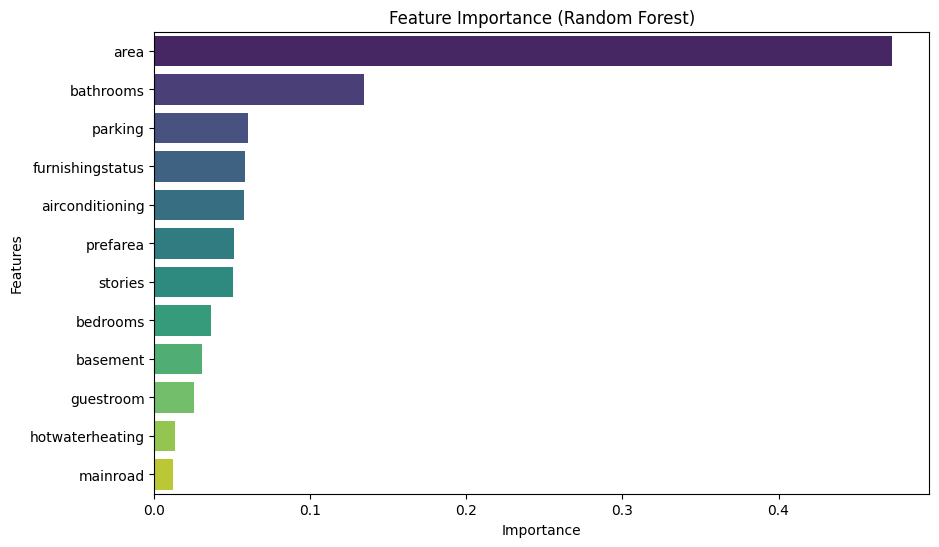

In [ ]:
#Feature Importance (Random Forest)
importances = rf.feature_importances_
feature_names = X_train.columns
feat_imp = pd.Series(importances, index=feature_names).sort_values(ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x=feat_imp, y=feat_imp.index, palette="viridis")
plt.title("Feature Importance (Random Forest)")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.show()


C:\Users\hanif\AppData\Local\Temp\ipykernel_18492\3828692734.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="furnishingstatus", y="price", data=df, palette="Set2")


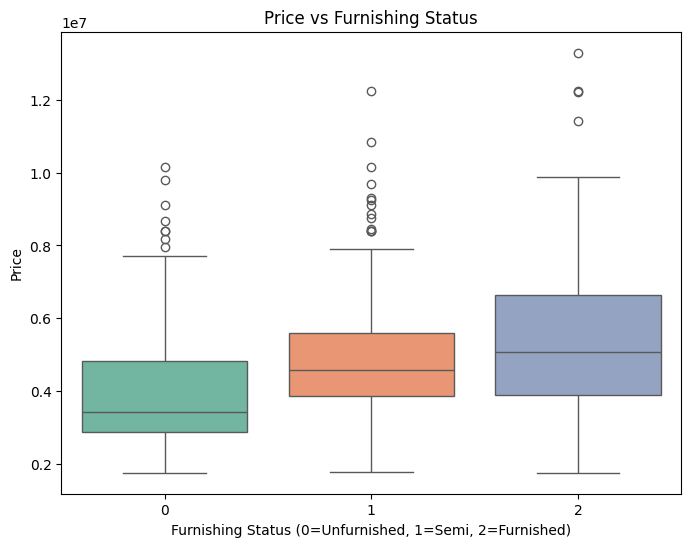

C:\Users\hanif\AppData\Local\Temp\ipykernel_18492\3828692734.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="bedrooms", y="price", data=df, palette="Set3")


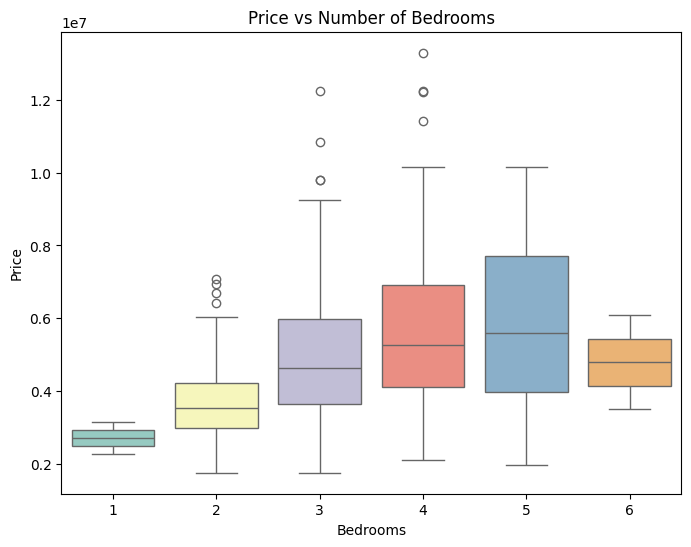

In [ ]:
#Boxplots
plt.figure(figsize=(8,6))
sns.boxplot(x="furnishingstatus", y="price", data=df, palette="Set2")
plt.title("Price vs Furnishing Status")
plt.xlabel("Furnishing Status (0=Unfurnished, 1=Semi, 2=Furnished)")
plt.ylabel("Price")
plt.show()

plt.figure(figsize=(8,6))
sns.boxplot(x="bedrooms", y="price", data=df, palette="Set3")
plt.title("Price vs Number of Bedrooms")
plt.xlabel("Bedrooms")
plt.ylabel("Price")
plt.show()


In [ ]:
# Scatter Linear Regression
fig1 = px.scatter(x=y_test, y=y_predict,
                  labels={"x": "Actual Prices", "y": "Predicted Prices"},
                  title=f"Actual vs Predicted Prices (Linear Regression, R²={r2_lin:.2f})")
fig1.add_shape(type="line",
               x0=y_test.min(), y0=y_test.min(),
               x1=y_test.max(), y1=y_test.max(),
               line=dict(color="red", dash="dash"))

# Scatter Random Forest
fig2 = px.scatter(x=y_test, y=y_pred,
                  labels={"x": "Actual Prices", "y": "Predicted Prices"},
                  title=f"Actual vs Predicted Prices (Random Forest, R²={r2:.2f})")
fig2.add_shape(type="line",
               x0=y_test.min(), y0=y_test.min(),
               x1=y_test.max(), y1=y_test.max(),
               line=dict(color="red", dash="dash"))

# Histogram
fig3 = px.histogram(house, x="price", nbins=30, title="Distribution of House Prices")

# Correlation Heatmap
corr = house.corr(numeric_only=True)
fig4 = px.imshow(corr, text_auto=True, aspect="auto", title="Correlation Heatmap")

# Feature Importance (Linear Regression)
coef_series = pd.Series(model.coef_, index=X_train.columns).sort_values(key=abs, ascending=False)
fig5 = px.bar(x=coef_series.values, y=coef_series.index,
              orientation="h", title="Feature Importance (Linear Regression)")

# Feature Importance (Random Forest)
feat_imp = pd.Series(rf.feature_importances_, index=X_train.columns).sort_values(ascending=False)
fig6 = px.bar(x=feat_imp.values, y=feat_imp.index,
              orientation="h", title="Feature Importance (Random Forest)")

# Boxplot Furnishingstatus
fig7 = px.box(house, x="furnishingstatus", y="price",
              title="Price vs Furnishing Status")

# Boxplot Bedrooms
fig8 = px.box(house, x="bedrooms", y="price",
              title="Price vs Number of Bedrooms")

app = Dash(__name__)

app.layout = html.Div([
    html.H1("Housing Dashboard", style={"textAlign": "center", "color": "white"}),

    html.H2("Data Visualizations", style={"color": "lightblue"}),

    dcc.Tabs([
        dcc.Tab(label="Linear Regression Scatter", children=[dcc.Graph(figure=fig1)]),
        dcc.Tab(label="Random Forest Scatter", children=[dcc.Graph(figure=fig2)]),
        dcc.Tab(label="Price Distribution", children=[dcc.Graph(figure=fig3)]),
        dcc.Tab(label="Correlation Heatmap", children=[dcc.Graph(figure=fig4)]),
        dcc.Tab(label="Feature Importance (Linear)", children=[dcc.Graph(figure=fig5)]),
        dcc.Tab(label="Feature Importance (Random Forest)", children=[dcc.Graph(figure=fig6)]),
        dcc.Tab(label="Furnishing Status", children=[dcc.Graph(figure=fig7)]),
        dcc.Tab(label="Bedrooms", children=[dcc.Graph(figure=fig8)]),
    ], style={"color": "black"}),

    html.H2("House Price Prediction", style={"color": "lightgreen", "marginTop": "20px"}),
    html.Div([
        html.Label("Area (sqft)"),
        dcc.Input(id="area", type="number", value=2000),

        html.Label("Bedrooms"),
        dcc.Input(id="bedrooms", type="number", value=3),

        html.Label("Bathrooms"),
        dcc.Input(id="bathrooms", type="number", value=2),

        html.Label("Stories"),
        dcc.Input(id="stories", type="number", value=1),

        html.Label("Parking"),
        dcc.Input(id="parking", type="number", value=1),

        html.Label("Mainroad (yes=1/no=0)"),
        dcc.Input(id="mainroad", type="number", value=1),

        html.Label("Guestroom (yes=1/no=0)"),
        dcc.Input(id="guestroom", type="number", value=0),

        html.Label("Basement (yes=1/no=0)"),
        dcc.Input(id="basement", type="number", value=0),

        html.Label("Hotwaterheating (yes=1/no=0)"),
        dcc.Input(id="hotwaterheating", type="number", value=0),

        html.Label("Airconditioning (yes=1/no=0)"),
        dcc.Input(id="airconditioning", type="number", value=1),

        html.Label("Prefarea (yes=1/no=0)"),
        dcc.Input(id="prefarea", type="number", value=1),

        html.Label("Furnishing Status (0=Unfurnished,1=Semi,2=Furnished)"),
        dcc.Input(id="furnishingstatus", type="number", value=1),

        html.Br(), html.Br(),
        html.Button("Predict Price", id="predict-btn", n_clicks=0),
        html.H3(id="prediction-output", style={"color": "#1d1d86"})
    ], style={
        "display": "grid", "gridTemplateColumns": "1fr 1fr",
        "gap": "10px", "backgroundColor": "#fff",
        "padding": "20px", "borderRadius": "10px"
    })
], style={"backgroundColor": "#222", "padding": "20px"})
@app.callback(
    Output("prediction-output", "children"),
    Input("predict-btn", "n_clicks"),
    State("area", "value"),
    State("bedrooms", "value"),
    State("bathrooms", "value"),
    State("stories", "value"),
    State("parking", "value"),
    State("mainroad", "value"),
    State("guestroom", "value"),
    State("basement", "value"),
    State("hotwaterheating", "value"),
    State("airconditioning", "value"),
    State("prefarea", "value"),
    State("furnishingstatus", "value")
)
def predict_price(n_clicks, area, bedrooms, bathrooms, stories, parking,
                  mainroad, guestroom, basement, hotwaterheating, airconditioning,
                  prefarea, furnishingstatus):
    if n_clicks > 0:
        user_data = pd.DataFrame([[ 
            area, bedrooms, bathrooms, stories,
            mainroad, guestroom, basement,
            hotwaterheating, airconditioning,
            parking,
            prefarea, furnishingstatus
        ]], columns=X_train.columns)
        
        predicted_price = model.predict(user_data)[0]
        return f"Predicted house price: {predicted_price:,.2f}"
    return ""

if __name__ == "__main__":
    app.run(debug=True)